### Problem Statement:
### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
### Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
df=pd.read_csv('Company_Data.csv')

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.Sales.mean()

7.496325000000001

In [5]:
df.Sales.median()

7.49

### EDA

In [6]:
df['sales']="small"
df.loc[df["Sales"]>7.49,"sales"]="large"
df.drop(["Sales"],axis=1,inplace=True)

In [7]:
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,large
1,111,48,16,260,83,Good,65,10,Yes,Yes,large
2,113,35,10,269,80,Medium,59,12,Yes,Yes,large
3,117,100,4,466,97,Medium,55,14,Yes,Yes,small
4,141,64,3,340,128,Bad,38,13,Yes,No,small
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,large
396,139,23,3,37,120,Medium,55,11,No,Yes,small
397,162,26,12,368,159,Medium,40,18,Yes,Yes,small
398,100,79,7,284,95,Bad,50,12,Yes,Yes,small


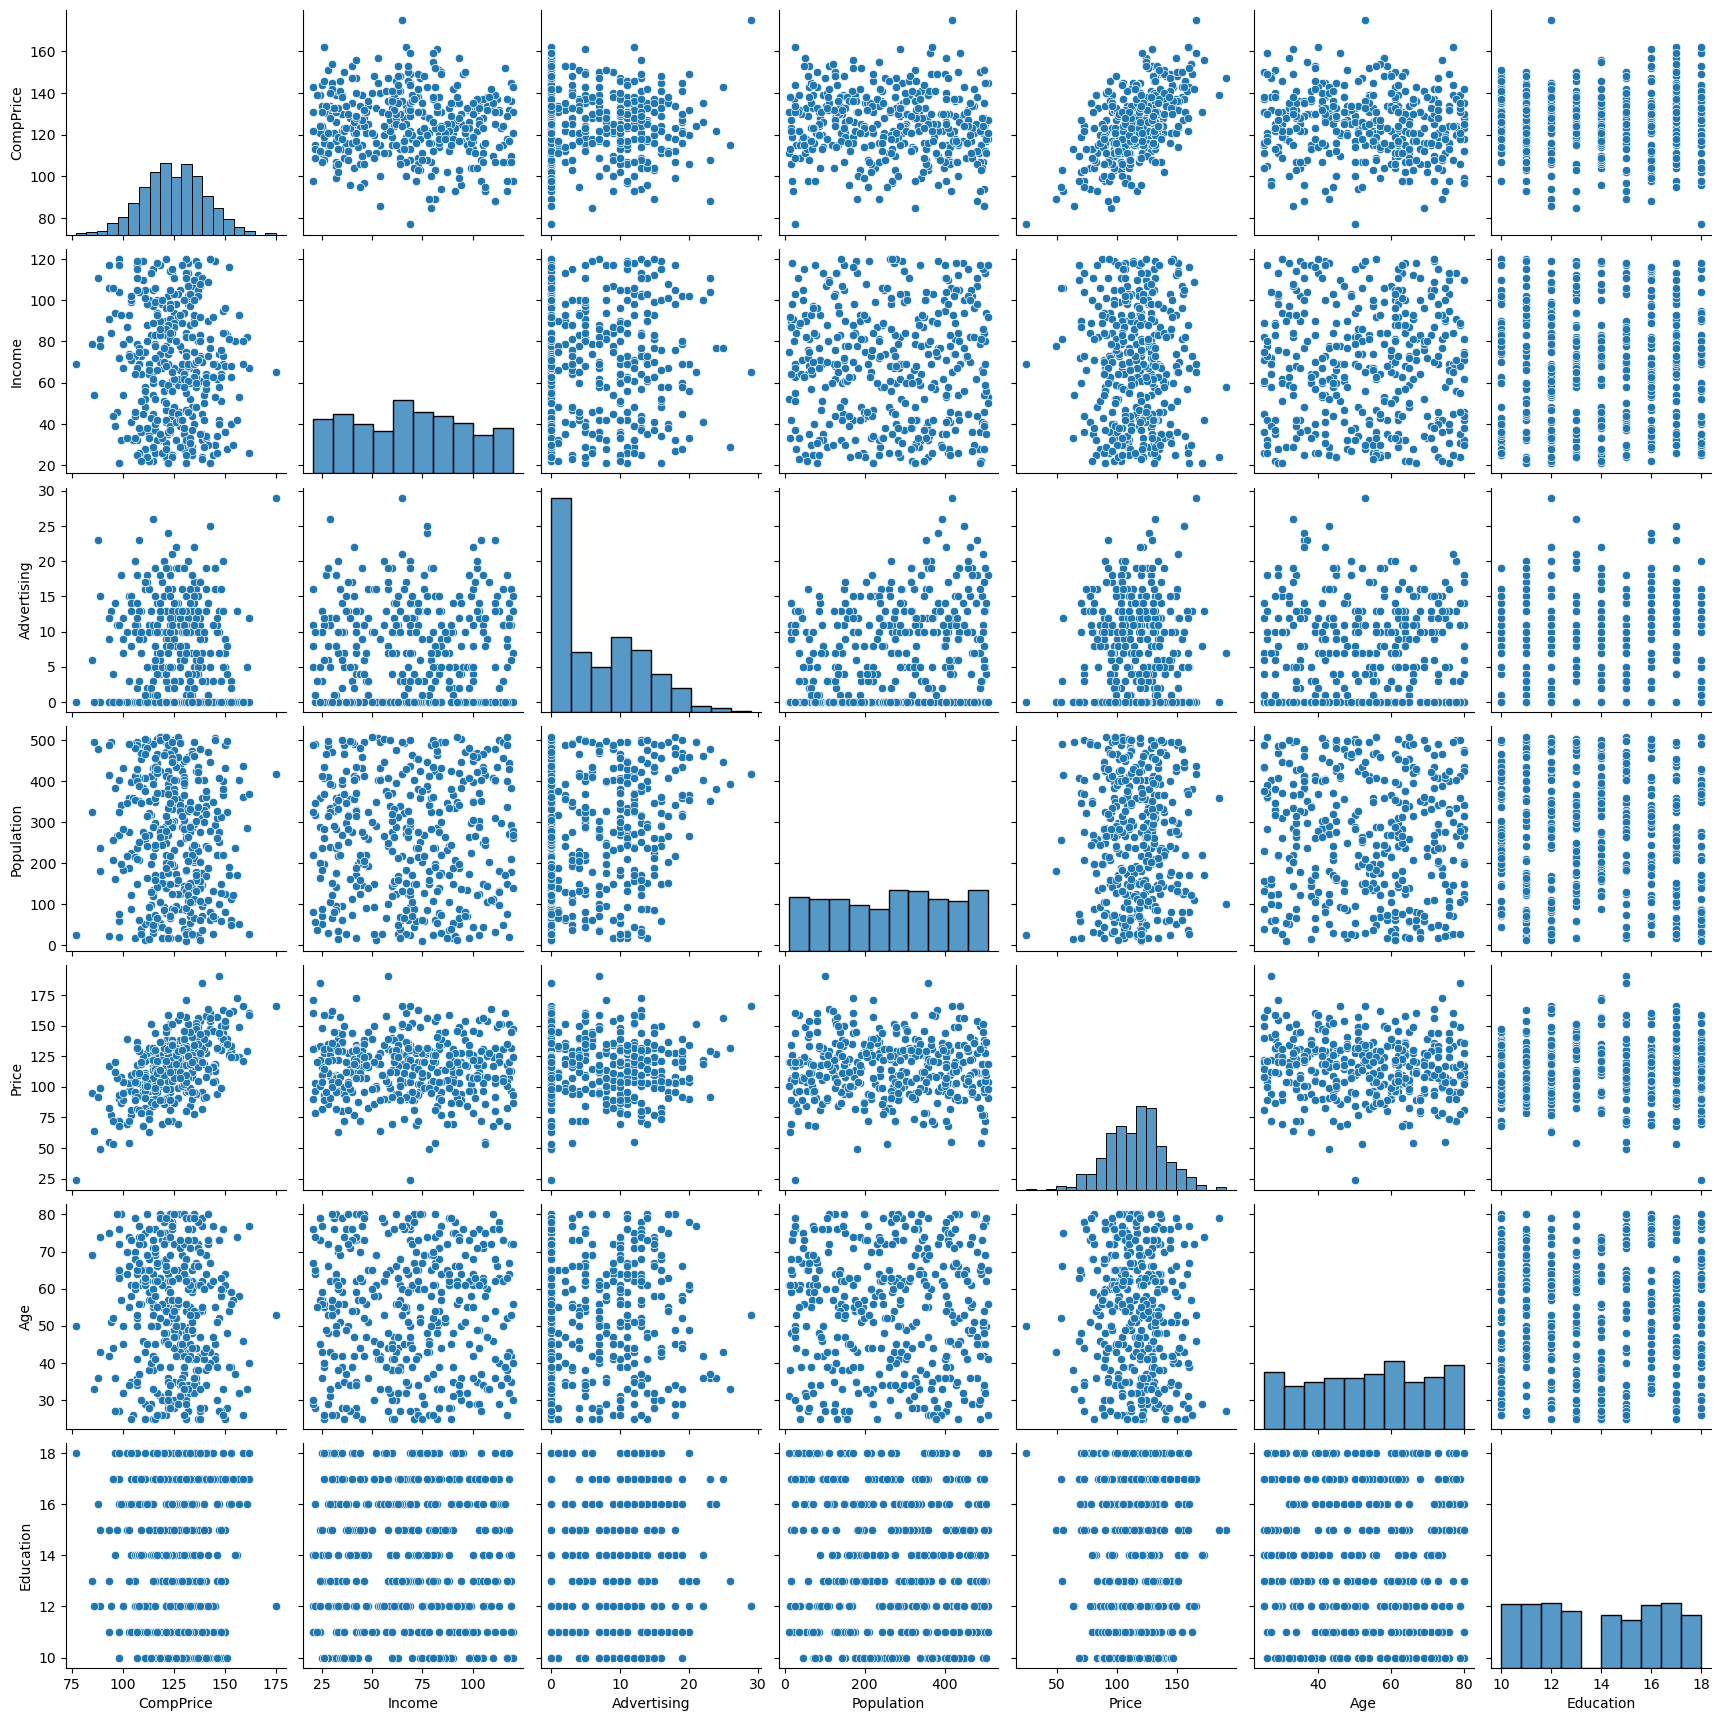

In [8]:
sns.pairplot(df)

In [9]:
target=df[['sales']]

In [10]:
features=df.drop(['sales'],axis=1)

#### Label encoding

In [11]:
lab_enc=LabelEncoder()

In [12]:
target['sales']=lab_enc.fit_transform(target['sales'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_19800\1465760694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['sales']=lab_enc.fit_transform(target['sales'])


In [13]:
target

,sales
0,0
1,0
2,0
3,1
4,1
...,...
395,0
396,1
397,1
398,1


array([[<Axes: title={'center': 'sales'}>]], dtype=object)

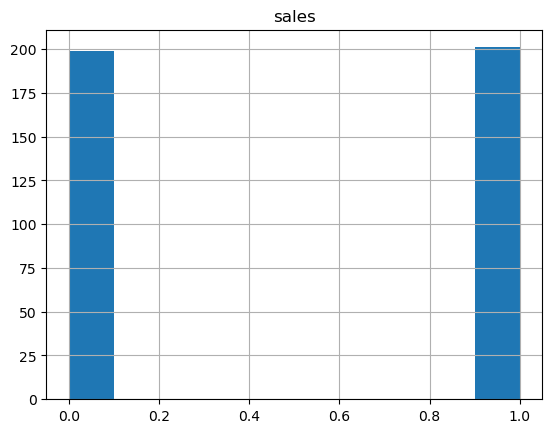

In [14]:
target.hist()

In [15]:
features['ShelveLoc']=lab_enc.fit_transform(features['ShelveLoc'])

In [16]:
features['Urban']=lab_enc.fit_transform(features['Urban'])

In [17]:
features['US']=lab_enc.fit_transform(features['US'])

In [18]:
featuress=features.corr()

<Axes: >

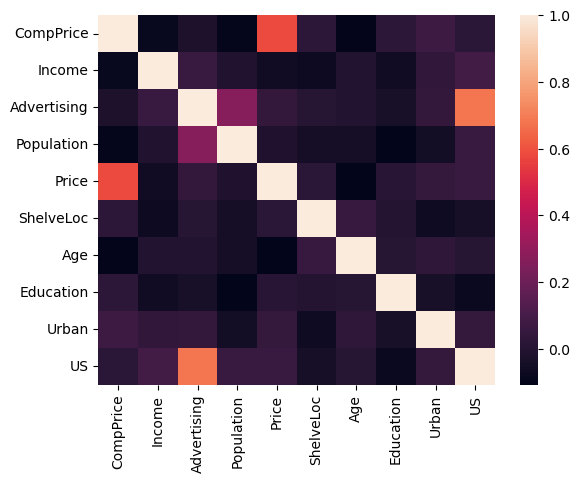

In [19]:
sns.heatmap(featuress)

#### Standardization

In [20]:
features

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [21]:
std=StandardScaler()

In [22]:
features=pd.DataFrame(std.fit_transform(features),columns=features.columns)

In [23]:
features

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.850455,0.155361,0.657177,0.075819,0.177823,-1.570698,-0.699782,1.184449,0.646869,0.741881
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-0.369399,0.721723,-1.490113,0.646869,0.741881
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.831899,0.350895,-0.725953,0.646869,0.741881
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.831899,0.103677,0.038208,0.646869,0.741881
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-1.570698,-0.947000,-0.343872,0.646869,-1.347925
...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-0.369399,-1.256023,0.038208,0.646869,0.741881
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.831899,0.103677,-1.108033,-1.545908,0.741881
397,2.417512,-1.526151,0.807733,0.700853,1.827078,0.831899,-0.823391,1.566529,0.646869,0.741881
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-1.570698,-0.205346,-0.725953,0.646869,0.741881


<Axes: >

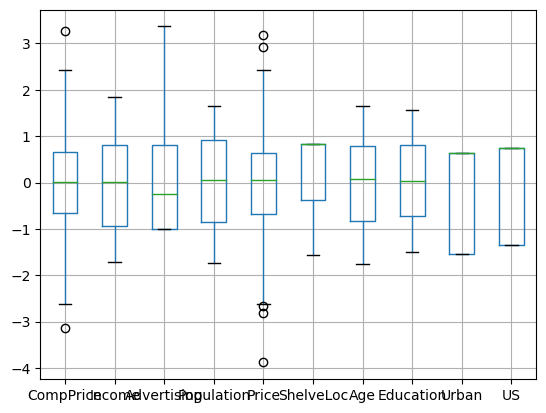

In [24]:
features.boxplot()

#### splitting the data

In [25]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=80)

#### Building the model

In [26]:
decc_tree=DecisionTreeClassifier(criterion='gini',  splitter='random',max_depth=4)

In [27]:
decc_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, splitter='random')

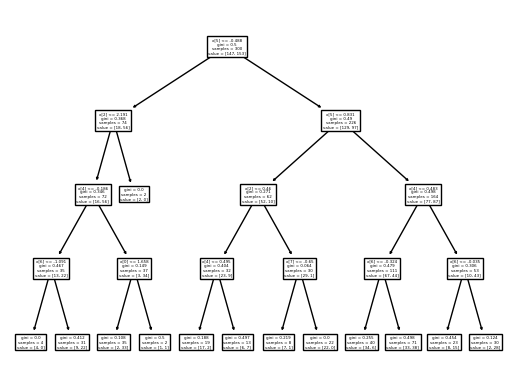

In [28]:
tree.plot_tree(decc_tree); 

In [29]:
y_pred=decc_tree.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred)

0.68

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64        52
           1       0.62      0.83      0.71        48

    accuracy                           0.68       100
   macro avg       0.70      0.69      0.68       100
weighted avg       0.70      0.68      0.67       100



In [32]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[28, 24],
       [ 8, 40]], dtype=int64)

<Axes: >

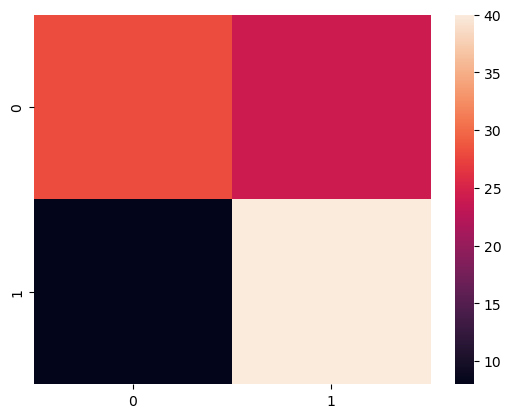

In [33]:
sns.heatmap(cm)

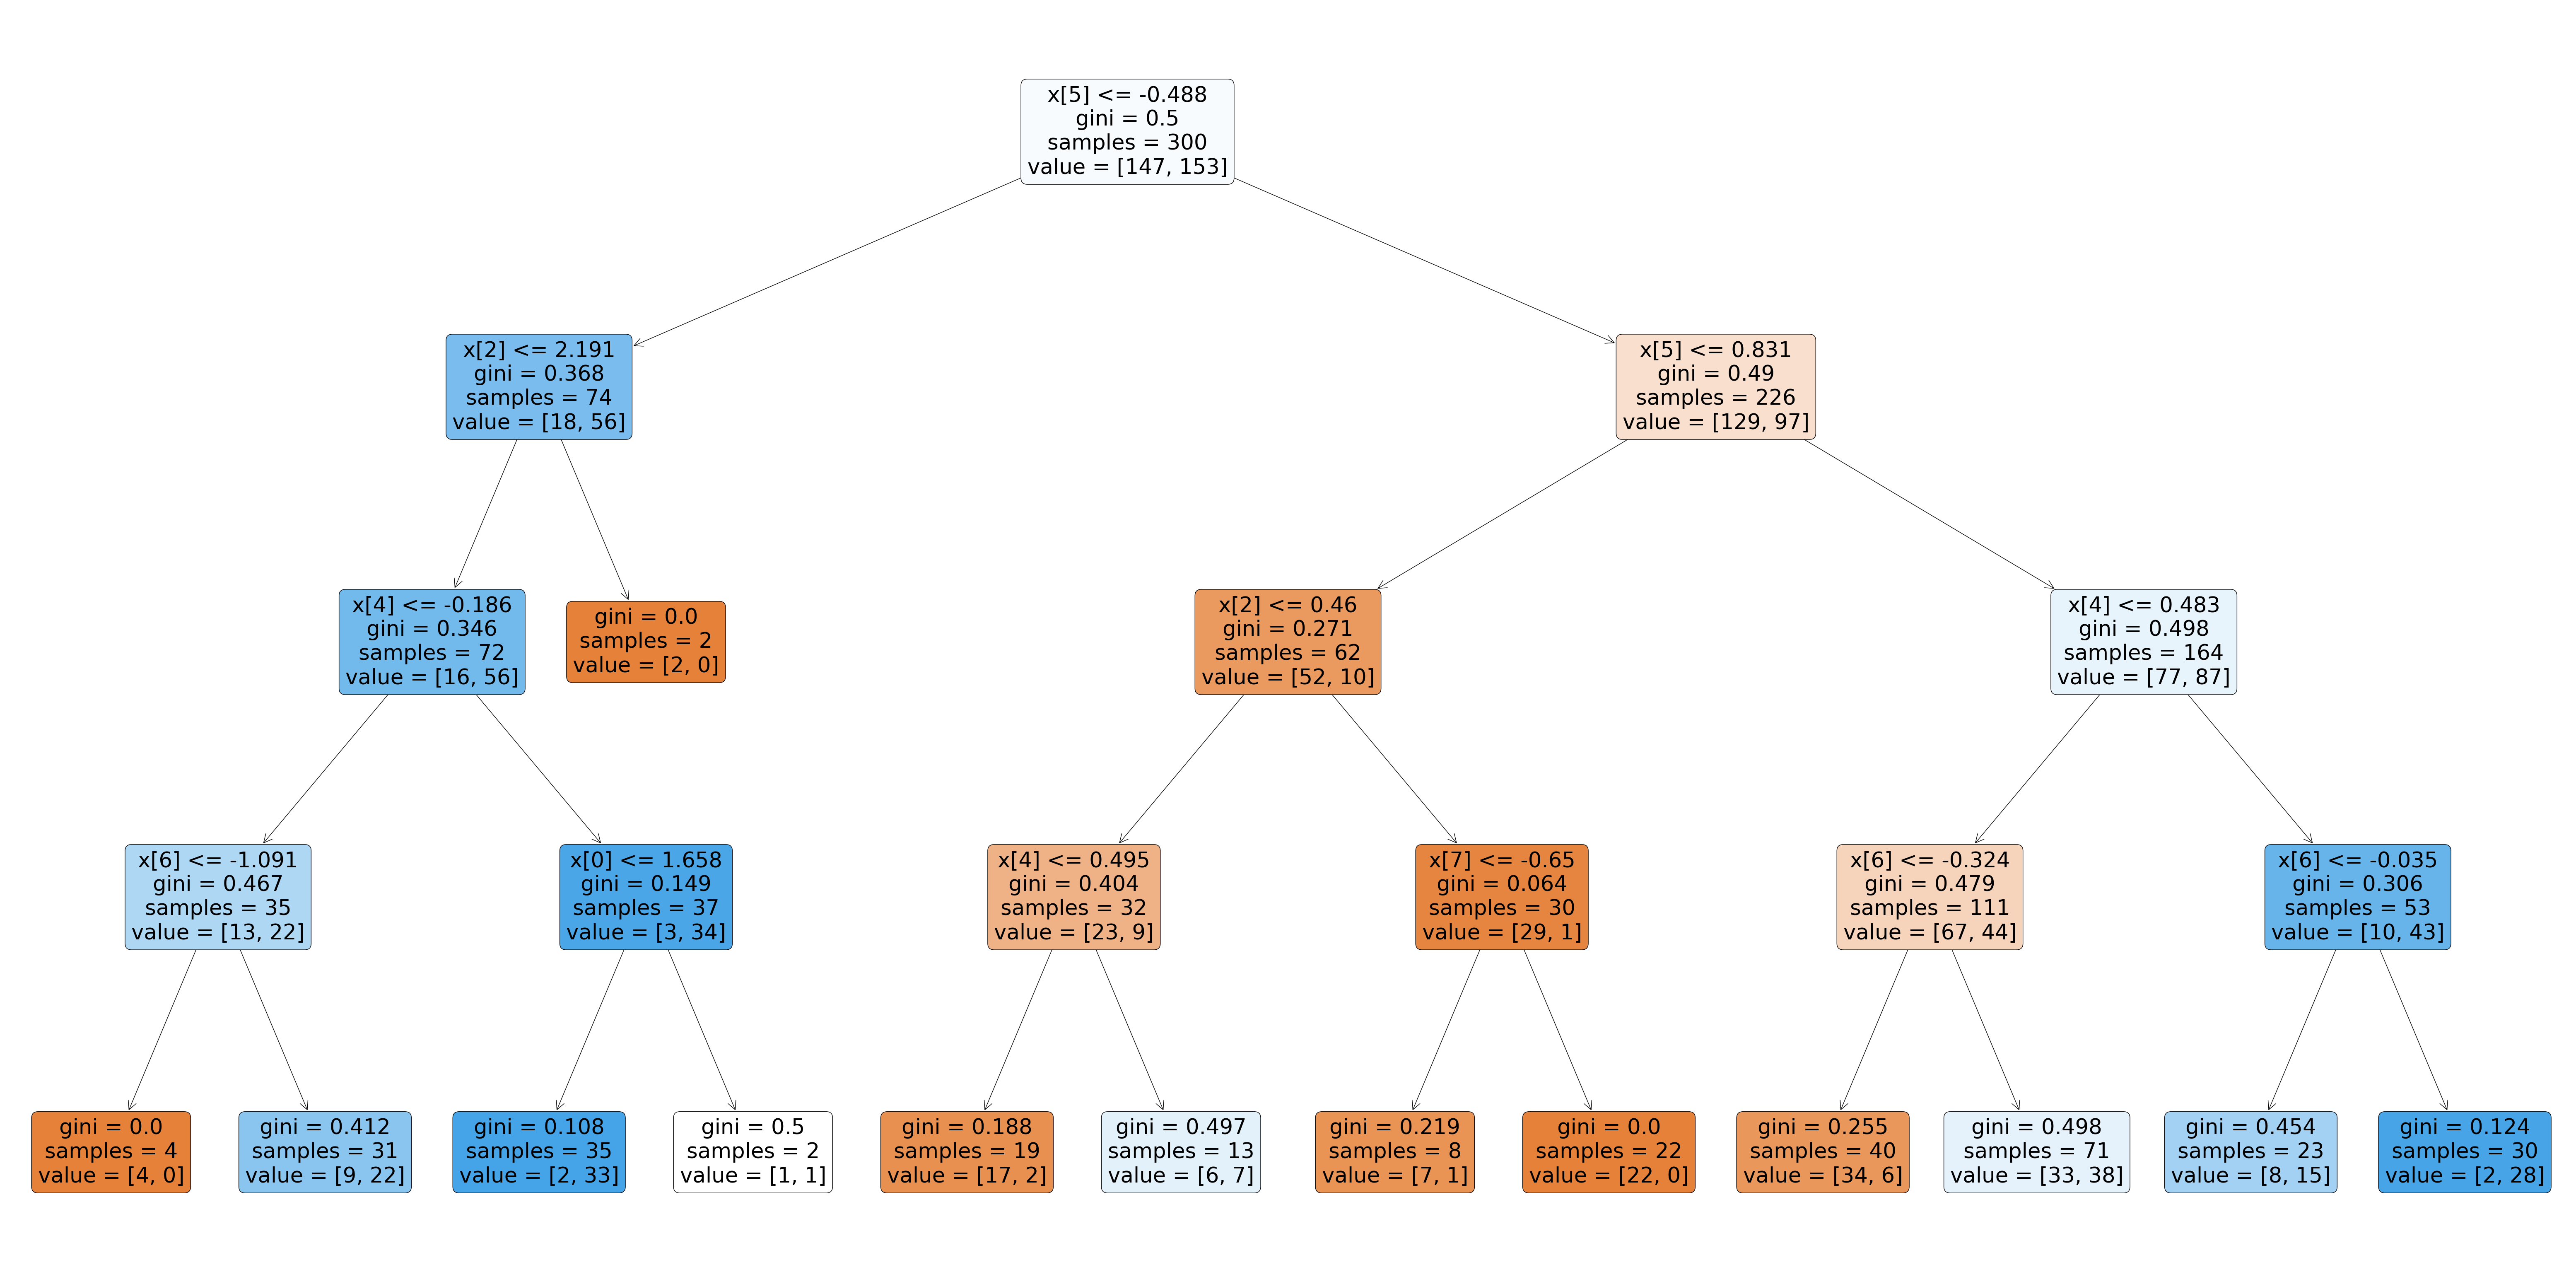

In [34]:
plt.figure(figsize=(80,40))
plot_tree(decc_tree,filled=True,rounded=True,class_names=df.get(target),feature_names=df.get(features));

#### Tuning the Hyper Parameters using Grid Search

In [35]:
params={'criterion' : ["gini", "entropy", "log_loss"],'splitter' : ["best", "random"],'max_depth':[1,2,3,4,5,6,7,8,10,20,30,100,200,]}

In [36]:
grid_search=GridSearchCV(decc_tree,params)

In [37]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4, splitter='random'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 20, 30, 100,
                                       200],
                         'splitter': ['best', 'random']})

In [38]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'splitter': 'random'}

# 